# Problem 2 #

In [345]:
import numpy as np 
from collections import Counter
import sys
from sympy import *
import seaborn as sns
np.set_printoptions(threshold=sys.maxsize)

In [348]:
N = 10 
r = 0.02 
d = 0.9
S0 = 100
dt = 1/N
K = 100

#### Lets populate the stock price array ####

In [349]:
stockPrice = np.zeros([2**N,N+1],dtype = 'longdouble')
stockPrice[0,0] = S0

for column in range(N):
    
    for row in range((Counter(stockPrice[:,column] > 0)[True]*2)):
        
        try:
            
            u = 1.1 * (column+16)/(column+17)
            d = 0.9
        
            stockPrice[row*2,column+1] = stockPrice[row,column]*u
            stockPrice[(row*2)+1,column+1] = stockPrice[row,column]*d
        
        except:
            break

#### Lets populate the Risk Neutral Probabilities array ####

In [352]:
Q = np.zeros([2**N,N],dtype = 'longdouble')
Q.shape

rho = 1 + r*dt

In [353]:
for column in range(Q.shape[1]):
    
    colIndex = Q.shape[1] - column - 1
    for row in range(int(Counter(stockPrice[:,colIndex+1] >0)[True]/2)):
        
        x = Symbol("x")
        q = solve([stockPrice[2*row,colIndex+1]*x/rho + (1-x)*stockPrice[2*row+1,colIndex+1]/rho - stockPrice[row,colIndex]],x)[x]
        
        Q[2*row,colIndex] = q
        Q[(2*row)+1,colIndex] = 1-q
        
        

#### Lets now Calculate the Price of the European Put ####

In [354]:
putPrice = np.zeros((stockPrice.shape),dtype = 'longdouble')

for i in range(len(putPrice)):
    putPrice[i,-1] = max(K-stockPrice[i,-1],0)

In [355]:
for column in range(putPrice.shape[1]-1):
    
    colIndex = putPrice.shape[1] - 2 - column

    for row in range(int(len(putPrice)/(2**(column+1)))):
        
        putPrice[row,colIndex] = Q[2*row,colIndex]*putPrice[2*row,colIndex+1]/rho + Q[2*row+1,colIndex]*putPrice[2*row+1,colIndex+1]/rho

<AxesSubplot:>

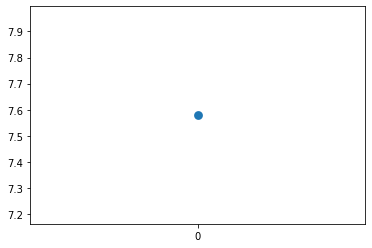

In [370]:
sns.pointplot(data=[putPrice[0,0]],markers = 'o')


# Problem 3 #

In [ ]:
N = 10 
r = 0.02 
d = 0.9
S0 = 100
dt = 1/N
K = 100

#### Lets populate the stock price array ####

In [241]:
stockPrice = np.zeros([2**N,N+1],dtype = 'longdouble')
stockPrice[0,0] = S0

for column in range(N):
    
    for row in range((Counter(stockPrice[:,column] > 0)[True]*2)):
        
        try:
            
            u = 1.1 * (column+16)/(column+17)
            d = 0.9
        
            stockPrice[row*2,column+1] = stockPrice[row,column]*u
            stockPrice[(row*2)+1,column+1] = stockPrice[row,column]*d
        
        except:
            break

#### Lets populate the Risk Neutral Probabilities array ####

In [125]:
Q = np.zeros([2**N,N],dtype = 'longdouble')
Q.shape

rho = 1 + r*dt

In [126]:
for column in range(Q.shape[1]):
    
    colIndex = Q.shape[1] - column - 1
    for row in range(int(Counter(stockPrice[:,colIndex+1] >0)[True]/2)):
        
        x = Symbol("x")
        q = solve([stockPrice[2*row,colIndex+1]*x/rho + (1-x)*stockPrice[2*row+1,colIndex+1]/rho - stockPrice[row,colIndex]],x)[x]
        
        Q[2*row,colIndex] = q
        Q[(2*row)+1,colIndex] = 1-q
        
        

#### Lets now Calculate the Price of the American Derivative ####

In [329]:
putPrice = np.zeros((stockPrice.shape),dtype = 'longdouble')

for i in range(len(putPrice)):
    if stockPrice[i,-1] >= 144:
        putPrice[i,-1] = np.sqrt(stockPrice[i,-1])
    else:
        putPrice[i,-1] = max(stockPrice[i,-1]-88,0)


In [330]:
for column in range(putPrice.shape[1]-1):
    
    colIndex = putPrice.shape[1] - 2 - column

    for row in range(int(len(putPrice)/(2**(column+1)))):
        
        putPrice[row,colIndex] = Q[2*row,colIndex]*putPrice[2*row,colIndex+1]/rho + Q[2*row+1,colIndex]*putPrice[2*row+1,colIndex+1]/rho

In [325]:
def exercise(x):
    "American Style option payoff function"
    if x>= 144:
        return np.sqrt(x)
    else:
        return max(x-88,0)

In [326]:
exercise = np.vectorize(exercise)
putPrice2 = exercise(stockPrice)

In [327]:
putPrice = np.maximum(putPrice,putPrice2)

In [338]:
exercisedArray = np.zeros(putPrice.shape)

for i in range(putPrice.shape[1]):
    for j in range(2**i):
        if putPrice[j,i] == putPrice2[j,i]:
            exercisedArray[j,i] = 1 

# Problem 4 #

In [ ]:
N = 10 
r = 0.02 
d = 0.9
S0 = 100
dt = 1/N
K = 100

#### Lets populate the stock price array ####

In [241]:
stockPrice = np.zeros([2**N,N+1],dtype = 'longdouble')
stockPrice[0,0] = S0

for column in range(N):
    
    for row in range((Counter(stockPrice[:,column] > 0)[True]*2)):
        
        try:
            
            u = 1.1 * (column+16)/(column+17)
            d = 0.9
        
            stockPrice[row*2,column+1] = stockPrice[row,column]*u
            stockPrice[(row*2)+1,column+1] = stockPrice[row,column]*d
        
        except:
            break

#### Lets populate the Risk Neutral Probabilities array ####

In [125]:
Q = np.zeros([2**N,N],dtype = 'longdouble')
Q.shape

rho = 1 + r*dt

In [126]:
for column in range(Q.shape[1]):
    
    colIndex = Q.shape[1] - column - 1
    for row in range(int(Counter(stockPrice[:,colIndex+1] >0)[True]/2)):
        
        x = Symbol("x")
        q = solve([stockPrice[2*row,colIndex+1]*x/rho + (1-x)*stockPrice[2*row+1,colIndex+1]/rho - stockPrice[row,colIndex]],x)[x]
        
        Q[2*row,colIndex] = q
        Q[(2*row)+1,colIndex] = 1-q
        
        

#### Lets now Calculate the Price of the Barrier Option ####

In [342]:
putPrice = np.zeros((stockPrice.shape),dtype = 'longdouble')

for i in range(len(putPrice)):
    if np.abs(stockPrice[i,-1]-100) < 60:
        putPrice[i,-1] = max(stockPrice[i,-1]-100,0)
    else:
        putPrice[i,-1] = 0


In [343]:
for column in range(putPrice.shape[1]-1):
    
    colIndex = putPrice.shape[1] - 2 - column

    for row in range(int(len(putPrice)/(2**(column+1)))):
        
        putPrice[row,colIndex] = Q[2*row,colIndex]*putPrice[2*row,colIndex+1]/rho + Q[2*row+1,colIndex]*putPrice[2*row+1,colIndex+1]/rho

array([[9.55759007e+00, 1.13109325e+01, 1.35759167e+01, 1.64646756e+01, 2.00954226e+01, 2.45703762e+01, 2.99416402e+01, 3.62088373e+01, 4.33047239e+01, 5.11082530e+01, 5.96149206e+01],
       [0.00000000e+00, 4.26371926e+00, 5.13328746e+00, 6.32512306e+00, 7.96324675e+00, 1.02198913e+01, 1.33100049e+01, 1.73824957e+01, 2.25484659e+01, 2.88149294e+01, 3.58177870e+01],
       [0.00000000e+00, 0.00000000e+00, 5.32074952e+00, 6.52243182e+00, 8.16218174e+00, 1.04065610e+01, 1.34769278e+01, 1.75674535e+01, 2.27567486e+01, 2.90386082e+01, 3.60354437e+01],
       [0.00000000e+00, 0.00000000e+00, 1.37307322e+00, 1.63664441e+00, 2.01010680e+00, 2.55175725e+00, 3.36256322e+00, 4.73565094e+00, 6.97711188e+00, 1.04195882e+01, 1.57537957e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.74501671e+00, 8.39518680e+00, 1.06361947e+01, 1.36804624e+01, 1.77709070e+01, 2.29848678e+01, 2.92826215e+01, 3.62720271e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.73610678e+00, 2.1